# Imports

In [8]:
import gzip
import json
import matplotlib.pyplot as plt
import os
import pandas as pd
import pyarrow.ipc as ipc
import pyarrow.feather as feather

from utils.loading import *

In [6]:
NOTEBOOK_PATH = os.getcwd()
DATA_PATH = os.path.join(NOTEBOOK_PATH, "data_youniverse")
CATEGORY = "People & Blogs"

# Data loading

In [7]:
df_channels_en = pd.read_csv(os.path.join(DATA_PATH, "df_channels_en.tsv.gz"), compression="infer", sep="\t") 
df_timeseries_en = pd.read_csv(f"{DATA_PATH}/df_timeseries_en.tsv.gz", compression="infer", sep="\t") # 20s

## Plot Category distribution

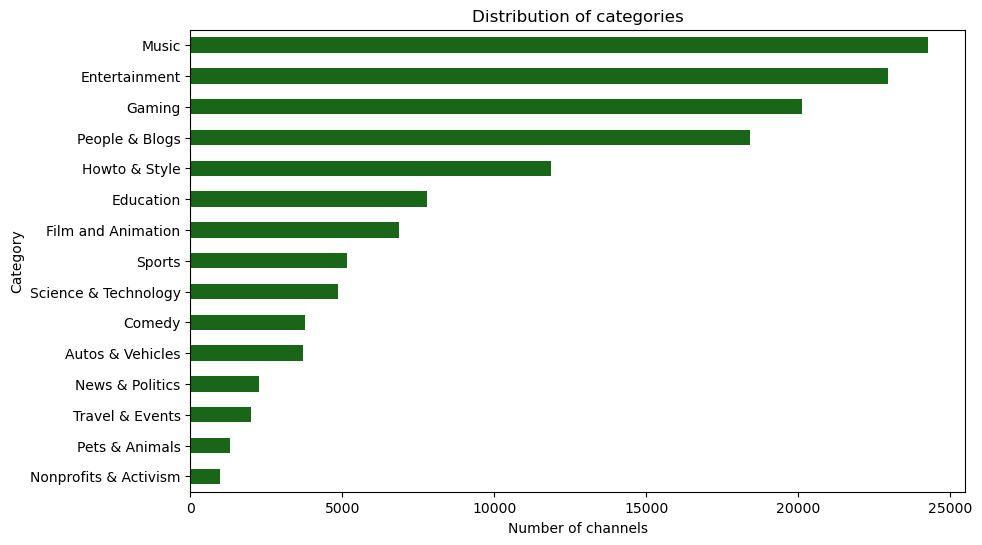

In [58]:
category_value_counts = df_channels_en["category_cc"].value_counts()

# Plot distribution of categories, emphasis on the People & Blogs category
plt.figure(figsize=(10, 6))
sns.barplot(x=category_value_counts.values, y=category_value_counts.index, orient="h", color="g", saturation=0.6, width=0.5)
plt.title("Distribution of categories")
plt.xlabel("Number of channels")
plt.ylabel("Category")
plt.show();

### Read People & Blogs channels' data

In [68]:
CATEGORY_FILE_NAME = ''.join(CATEGORY.split(" ")).lower()
CATEGORY_FILE_PATH = os.path.join(DATA_PATH, f"df_channels_{CATEGORY_FILE_NAME}.tsv.gz")

yt_metadata_filtered = load_and_filter_jsonl_gz_file_by_chunks(os.path.join(DATA_PATH, "yt_metadata_en.jsonl.gz"), CATEGORY)
yt_metadata_filtered.to_csv(CATEGORY_FILE_PATH, index=False, compression="gzip") # 17m 14s | category = People & Blogs
yt_metadata_filtered.head()

In [24]:
df_feather = feather.read_feather(os.path.join(DATA_PATH, 'yt_metadata_helper.feather'))

In [26]:
df_feather.sort_values(by='like_count')

,categories,channel_id,dislike_count,display_id,duration,like_count,upload_date,view_count
26399482,Pets & Animals,UCXnvLHEf5t4ncz2DCLRMmpQ,0.0,mN88k1HrcYM,29,0.0,2017-04-19,26.0
65183210,Travel & Events,UC3KfELiIm0fy_VhiE37xKWQ,0.0,-TTYpmTHTJ8,125,0.0,2012-05-16,116.0
65183202,Travel & Events,UC3KfELiIm0fy_VhiE37xKWQ,1.0,9NqUZO0P6Sc,307,0.0,2012-06-04,396.0
65183201,News & Politics,UC3KfELiIm0fy_VhiE37xKWQ,0.0,DL-vCHMJVT8,1686,0.0,2012-06-05,68.0
65183200,News & Politics,UC3KfELiIm0fy_VhiE37xKWQ,0.0,c82Mux9ed-g,1677,0.0,2012-06-05,228.0
...,...,...,...,...,...,...,...,...
72899529,People & Blogs,UCrx5pVziMo1qzF8isicR5SQ,NaN,59LrsaH6ZaA,24,NaN,2014-08-27,5403358.0
72899530,People & Blogs,UCrx5pVziMo1qzF8isicR5SQ,NaN,nBwIwOPCsNk,14,NaN,2014-08-27,217454.0
72899584,People & Blogs,UCrx5pVziMo1qzF8isicR5SQ,NaN,fSYOvDbTZrQ,19,NaN,2012-09-07,6707.0
72899634,Film & Animation,UCrx3p5YDUOsD_RuKhfrXEIQ,NaN,W-HTE1P5z4g,145,NaN,2015-10-06,41657.0
